In [1]:
import pandas as pd
import numpy as np

In [12]:
def read_in(file):
    df = pd.read_csv(file, dtype="str")
    df.drop(["metro_area", "place_id", "country_region", "iso_3166_2_code"], inplace = True, axis = 1)
    df.columns = ["country", "state", "county", "fips code", "date", \
    "retail_rec", "grocery_pharm", "parks", "transit", "workplace", "residential"]
    df_mid = df[df["state"].isin(["Illinois", "Ohio", "Michigan", "Missouri"]) ]
    return df_mid

In [3]:
import os
os.chdir("/Users/sophiamlawer/ML_project/CAPP-30254-Covid-Variants")
os.getcwd()

'/Users/sophiamlawer/ML_project/CAPP-30254-Covid-Variants'

In [30]:
df = read_in("Raw Data/2020_US_Region_Mobility_Report.csv")
df2 = read_in("Raw Data/2021_US_Region_Mobility_Report.csv")
df = df.append(df2, ignore_index=True)
#df["st_county"] = df.state + " - " + df.county
df = df.rename(columns = {"fips code": "fips"})
print(df.fips.nunique())
df.head()

377


,country,state,county,fips,date,retail_rec,grocery_pharm,parks,transit,workplace,residential
0,US,Illinois,NaN,NaN,2020-02-15,4,3,10,3,3,-1
1,US,Illinois,NaN,NaN,2020-02-16,8,2,29,3,2,-1
2,US,Illinois,NaN,NaN,2020-02-17,2,-3,-14,-13,-23,6
3,US,Illinois,NaN,NaN,2020-02-18,1,-1,5,2,1,0
4,US,Illinois,NaN,NaN,2020-02-19,1,-1,3,2,1,0


In [31]:
df[["retail_rec", "grocery_pharm", "parks", "transit", "workplace", "residential"]].astype(float)
print(df.shape)
df = df[df['fips'].notna()]
df['date']= pd.to_datetime(df['date'])
#df.dropna(subset = ["fips"])
#df.columns
print(df.shape)
df

(147363, 11)
(145635, 11)


,country,state,county,fips,date,retail_rec,grocery_pharm,parks,transit,workplace,residential
321,US,Illinois,Adams County,17001,2020-02-15,3,2,NaN,NaN,6,0
322,US,Illinois,Adams County,17001,2020-02-16,16,4,NaN,NaN,7,NaN
323,US,Illinois,Adams County,17001,2020-02-17,5,4,NaN,-12,-9,4
324,US,Illinois,Adams County,17001,2020-02-18,3,-4,NaN,NaN,1,0
325,US,Illinois,Adams County,17001,2020-02-19,4,-2,NaN,NaN,4,0
...,...,...,...,...,...,...,...,...,...,...,...
147358,US,Ohio,Wyandot County,39175,2021-04-17,7,NaN,NaN,14,-15,NaN
147359,US,Ohio,Wyandot County,39175,2021-04-18,NaN,NaN,NaN,23,-20,NaN
147360,US,Ohio,Wyandot County,39175,2021-04-19,NaN,NaN,NaN,-1,-11,2
147361,US,Ohio,Wyandot County,39175,2021-04-20,NaN,NaN,NaN,0,-11,3


In [34]:
#Export 
df.to_csv("Data/Mobility Data.csv", index=False)

In [17]:
# Explore Missing Data
miss = df.drop('fips', 1).isna().groupby([df.fips], sort=False).sum().reset_index()
miss["total"] = miss.iloc[:,-6:].sum(axis=1)
print(miss[miss["total"] > 407]["county"].shape)
miss.sort_values(by="total", ascending=False)

(311,)


,fips,country,state,county,date,retail_rec,grocery_pharm,parks,transit,workplace,residential,total
340,39105,0,0,0,0,356,407,407,407,0,407,1984
124,26053,0,0,0,0,351,393,402,402,5,402,1955
185,29013,0,0,0,0,356,374,407,407,0,407,1951
14,17033,0,0,0,0,354,389,407,407,0,390,1947
31,17067,0,0,0,0,361,361,407,407,0,407,1943
...,...,...,...,...,...,...,...,...,...,...,...,...
312,39049,0,0,0,0,0,0,9,0,0,0,9
19,17043,0,0,0,0,0,0,5,2,0,0,7
267,29199,0,0,0,0,1,1,1,1,0,1,5
376,29035,0,0,0,0,1,1,1,1,0,1,5


In [24]:
df.describe()

,fips code,retail_rec,grocery_pharm,parks,transit,workplace,residential
count,145635.000000,98175.000000,87471.000000,27132.000000,50204.000000,144798.000000,87299.000000
mean,27897.533999,-7.414311,2.167404,41.335250,-7.873277,-20.859280,7.096462
std,7920.221895,20.616024,14.893893,69.051747,25.118870,15.387209,5.854587
min,17001.000000,-100.000000,-91.000000,-90.000000,-89.000000,-90.000000,-8.000000
25%,17199.000000,-19.000000,-6.000000,-8.000000,-25.000000,-30.000000,3.000000
50%,29019.000000,-6.000000,1.000000,23.000000,-6.000000,-20.000000,6.000000
75%,39003.000000,5.000000,9.000000,78.000000,8.000000,-11.000000,10.000000
max,39175.000000,226.000000,171.000000,544.000000,252.000000,48.000000,36.000000


In [18]:
df['date']= pd.to_datetime(df['date'])
df

,country,state,county,fips,date,retail_rec,grocery_pharm,parks,transit,workplace,residential
0,US,Illinois,NaN,NaN,2020-02-15,4,3,10,3,3,-1
1,US,Illinois,NaN,NaN,2020-02-16,8,2,29,3,2,-1
2,US,Illinois,NaN,NaN,2020-02-17,2,-3,-14,-13,-23,6
3,US,Illinois,NaN,NaN,2020-02-18,1,-1,5,2,1,0
4,US,Illinois,NaN,NaN,2020-02-19,1,-1,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
147358,US,Ohio,Wyandot County,39175,2021-04-17,7,NaN,NaN,14,-15,NaN
147359,US,Ohio,Wyandot County,39175,2021-04-18,NaN,NaN,NaN,23,-20,NaN
147360,US,Ohio,Wyandot County,39175,2021-04-19,NaN,NaN,NaN,-1,-11,2
147361,US,Ohio,Wyandot County,39175,2021-04-20,NaN,NaN,NaN,0,-11,3


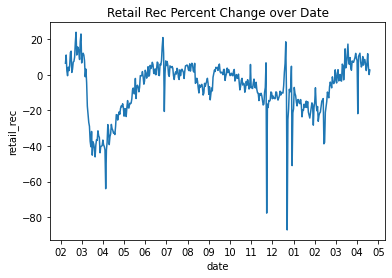

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
sns.lineplot(x=df.date, y="retail_rec", data=df).\
set(title="Retail Rec Percent Change over Date")
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=30))
plt.show()

<AxesSubplot:xlabel='date', ylabel='retail_rec'>

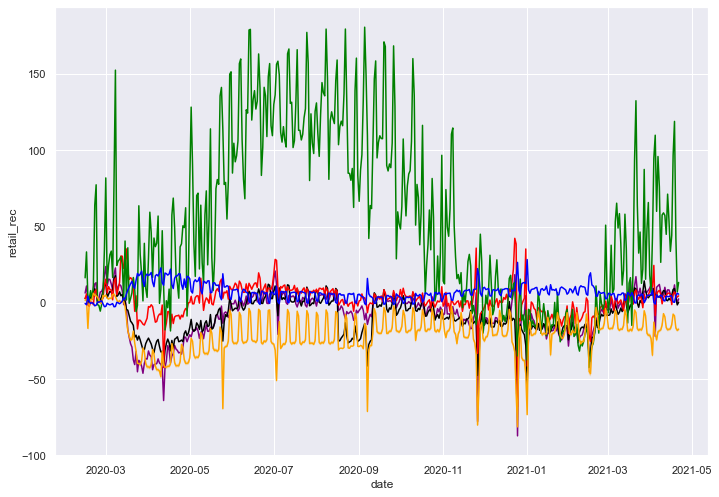

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x=df.date, y="retail_rec", data=df, color='purple')
sns.lineplot(x=df.date, y="transit", data=df, color='black')
sns.lineplot(x=df.date, y="grocery_pharm", data=df, color='red')
sns.lineplot(x=df.date, y="parks", data=df, color='green')
sns.lineplot(x=df.date, y="workplace", data=df, color='orange')
sns.lineplot(x=df.date, y="residential", data=df, color='blue')

<AxesSubplot:xlabel='date', ylabel='retail_rec'>

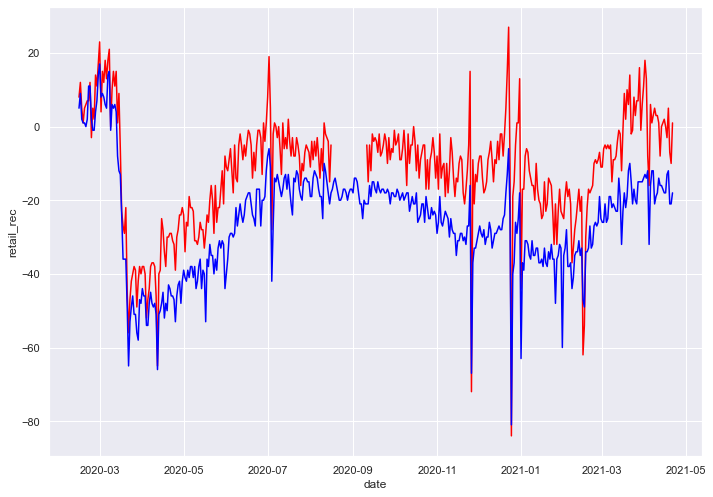

In [28]:
data_conserv= df[df["county"]== "Effingham County"]
data_lib= df[df["county"]== "Cook County"]
sns.lineplot(x=df.date, y="retail_rec", data=data_conserv, color='red')
sns.lineplot(x=df.date, y="retail_rec", data=data_lib, color='blue')